In [1]:
# Standard library imports

# Third-party imports
import numpy as np                   # For numerical operations and array manipulations
import cv2                           # OpenCV for image and video processing
from matplotlib import pyplot as plt # For plotting and visualizing data
from PIL import Image                # For image file operations
from IPython import display          # For displaying images and videos within Jupyter Notebook

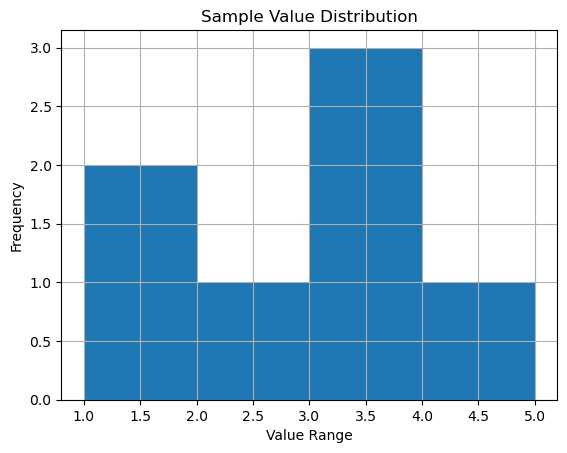

In [2]:
# Plotting a histogram of values using pyplot.
sample_values = [1.1, 1.5, 2.2, 3.5, 3.5, 3.6, 4.1]
number_of_bins = 4
value_range = (1, 5)

plt.hist(sample_values, bins=number_of_bins, range=value_range)
plt.title('Sample Value Distribution')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

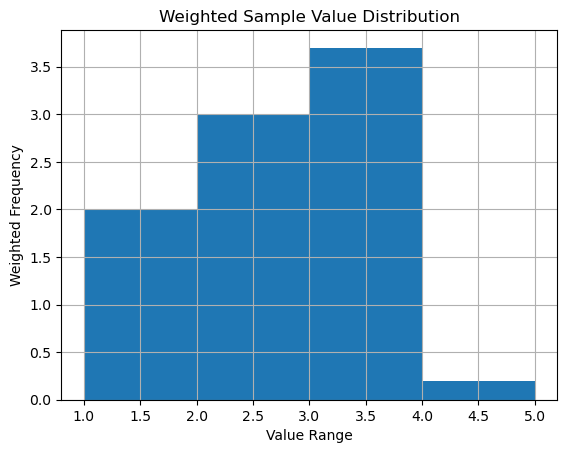

In [3]:
# Plotting a weighted histogram of values using pyplot.
sample_values = [1.1, 1.5, 2.2, 3.5, 3.5, 3.6, 4.1]
sample_weights = [1.0, 1.0, 3.0, 1.2, 1.4, 1.1, 0.2]
number_of_bins = 4
value_range = (1, 5)

plt.hist(sample_values, bins=number_of_bins, range=value_range, weights=sample_weights)
plt.title('Weighted Sample Value Distribution')
plt.xlabel('Value Range')
plt.ylabel('Weighted Frequency')
plt.grid(True)
plt.show()

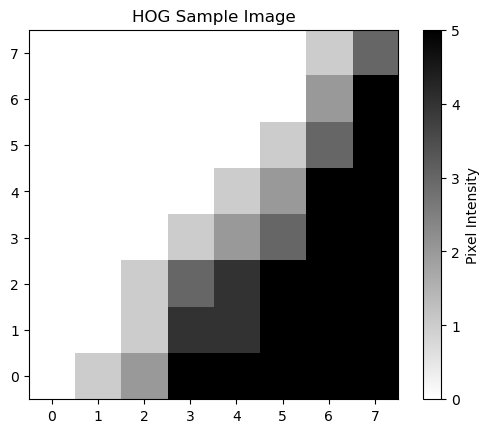

In [4]:
# Preparing a sample image array to demonstrate HOG features.
hog_sample_image = np.array([
    [0, 1, 2, 5, 5, 5, 5, 5],
    [0, 0, 1, 4, 4, 5, 5, 5],
    [0, 0, 1, 3, 4, 5, 5, 5],
    [0, 0, 0, 1, 2, 3, 5, 5],
    [0, 0, 0, 0, 1, 2, 5, 5],
    [0, 0, 0, 0, 0, 1, 3, 5],
    [0, 0, 0, 0, 0, 0, 2, 5],
    [0, 0, 0, 0, 0, 0, 1, 3],
], dtype='float64')

plt.imshow(hog_sample_image, cmap='binary', origin='lower')
plt.title('HOG Sample Image')
plt.colorbar(label='Pixel Intensity')
plt.show()

In [5]:
# Calculating the gradients in x and y directions using Sobel operator.
gradient_x = cv2.Sobel(hog_sample_image, cv2.CV_64F, 1, 0, ksize=1)
gradient_y = cv2.Sobel(hog_sample_image, cv2.CV_64F, 0, 1, ksize=1)

# Converting the Cartesian coordinates to polar coordinates.
magnitude, orientation = cv2.cartToPolar(gradient_x, gradient_y, angleInDegrees=True)

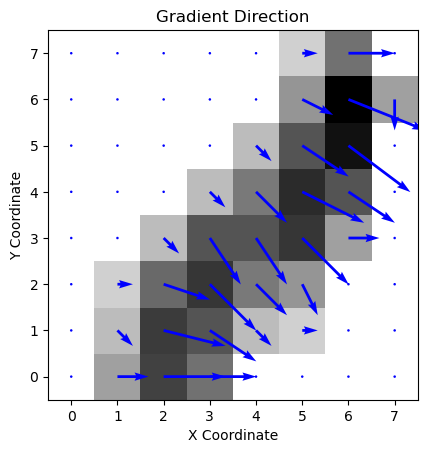

In [6]:
# Displaying the gradient magnitude as an image.
plt.imshow(magnitude, cmap='binary', origin='lower')
plt.title('Gradient Magnitude')

# Adding a quiver plot to show the gradient directions.
plt.quiver(gradient_x, gradient_y, color='blue')
plt.title('Gradient Direction')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

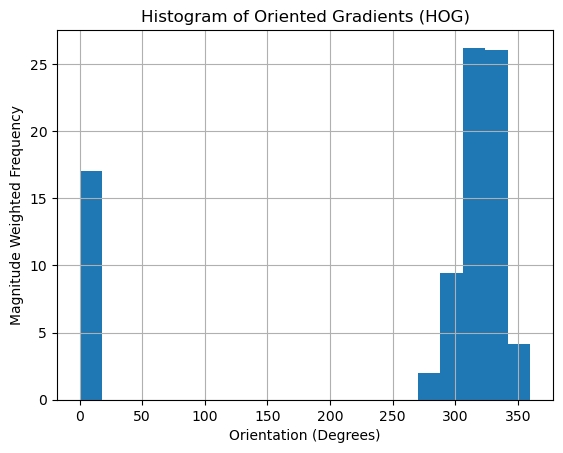

In [7]:
# Plotting the Histogram of Oriented Gradients (HOG) values.
orientation_flattened = orientation.reshape(-1)
magnitude_flattened = magnitude.reshape(-1)
number_of_bins = 20
orientation_range = (0, 360)

plt.hist(orientation_flattened, weights=magnitude_flattened, bins=number_of_bins, range=orientation_range)
plt.title('Histogram of Oriented Gradients (HOG)')
plt.xlabel('Orientation (Degrees)')
plt.ylabel('Magnitude Weighted Frequency')
plt.grid(True)
plt.show()

In [8]:
# Initializing the HOG descriptor for human detection.
hog_descriptor = cv2.HOGDescriptor()

# Setting the SVM detector to the default people detector.
hog_descriptor.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [9]:
# Loading the video from the specified path using OpenCV.
video_path = '../data/video.mp4'
video_capture = cv2.VideoCapture(video_path)

# Ensuring the video is opened successfully.
if not video_capture.isOpened():
    raise IOError("Cannot open the video file: {}".format(video_path))

# Reading the first frame from the video.
success, frame = video_capture.read()
if not success:
    raise IOError("Cannot read the first frame from the video")

In [10]:
# Pedestrian detection in a video frame using HOG descriptor.

# Resizing the frame for faster detection.
resized_frame = cv2.resize(frame, (640, 480))

# Converting the frame to grayscale for faster detection.
gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_RGB2GRAY)

# Detecting people in the resized grayscale image.
# The function returns the bounding boxes and weights for the detected objects.
bounding_boxes, detection_weights = hog_descriptor.detectMultiScale(gray_frame, winStride=(8, 8))

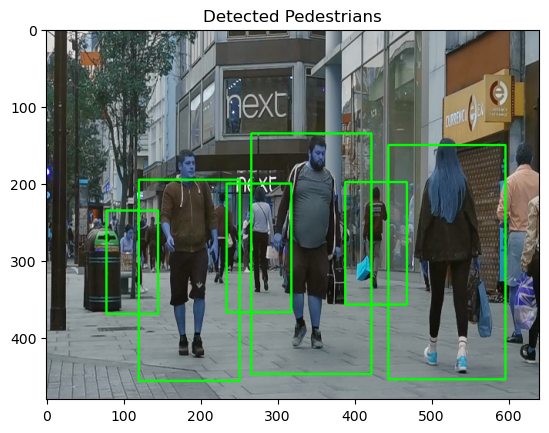

In [11]:
# Drawing bounding boxes on the image for detected pedestrians and visualizing it.

# Converting the bounding box coordinates to a numpy array.
bounding_box_coords = np.array([[x, y, x + width, y + height] for (x, y, width, height) in bounding_boxes])

# Drawing each bounding box on the frame.
for (left, top, right, bottom) in bounding_box_coords:
    cv2.rectangle(resized_frame, (left, top), (right, bottom), (0, 255, 0), 2)

# Converting the frame to an image format for visualization using pyplot.
visualized_frame = Image.fromarray(resized_frame)
plt.imshow(visualized_frame)
plt.title('Detected Pedestrians')
plt.show()

Video processing interrupted.
Released video resources.


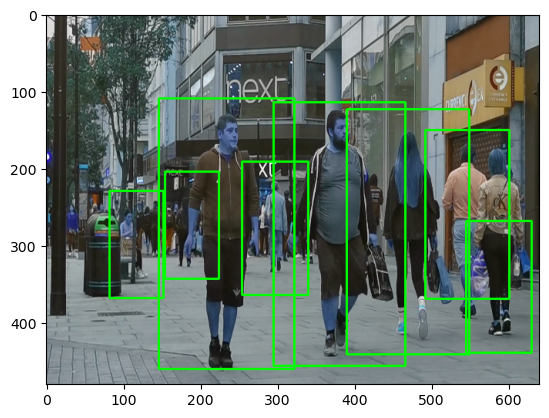

In [12]:
try:
    frame_count = 0  # Initialize a frame counter
    max_frames = 100  # Set a limit to the number of frames to process

    # Examining the entire video for pedestrian detection.
    while frame_count < max_frames:
        # Capture frame-by-frame.
        success, frame = video_capture.read()
        if not success:
            break  # Exit the loop if no frame is captured

        # Resizing the frame for faster detection.
        resized_frame = cv2.resize(frame, (640, 480))

        # Converting to grayscale for faster detection.
        gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_RGB2GRAY)

        # Detecting pedestrians in the frame.
        bounding_boxes, detection_weights = hog_descriptor.detectMultiScale(gray_frame, winStride=(8, 8))

        # Drawing bounding boxes on the frame.
        for (x, y, w, h) in bounding_boxes:
            cv2.rectangle(resized_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Converting the frame to an image format for visualization using pyplot.
        visualized_frame = Image.fromarray(resized_frame)
        plt.imshow(visualized_frame)
        display.clear_output(wait=True)
        display.display(plt.gcf())

        frame_count += 1  # Increment the frame counter

except KeyboardInterrupt:
    print("Video processing interrupted.")

finally:
    # Releasing video capture resource.
    video_capture.release()
    print("Released video resources.")